In [30]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
ma_palette = ['#FF8B33', '#BB33FF']
sns.set_palette(ma_palette)

In [31]:
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring="f1", names= "Default"):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Confusion_matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print("Cassification_report : ")
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train, cv =3, scoring = chosen_scoring, train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis= 1), label = 'train score')
    plt.xlabel("Data Set %")
    plt.plot(N, val_score.mean(axis= 1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(names)
    plt.legend()
    plt.show()

In [32]:
files = [file for file in os.listdir("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/cryptos")]
for file in files:
    print(file)
files2 = [file2 for file2 in os.listdir("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/nasdaq")]
for file2 in files2:
    print(file2)

année_2018_flat_DF.csv
année_2021_Oct_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv
année_2018_flat_DF.csv
année_2021_Oct_DF.csv
covid_DF.csv
année_2018_DF.csv
rdm2_DF.csv
année_2019_flat_DF.csv
ukr_war_DF.csv
année_2021_Nov_DF.csv
rdm1_DF.csv
rdm3_DF.csv


In [33]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/cryptos/"+file, index_col = [0])
    all_data = pd.concat([all_data, df])
for file2 in files2:
    df = pd.read_csv("assets/best_models/Anticor_BAH_BCRP_BestMarkowitz_BestSoFar_BNN_CORN_CRP_CWMR_DynamicCRP_EG_OLMAR_ONS_PAMR_RMR/nasdaq/"+file2, index_col = [0])
    all_data = pd.concat([all_data, df])
all_data = all_data.reset_index()
all_data = all_data.drop(['index'], axis = 1)

In [34]:
all_data['algo'].value_counts(normalize=True)
# Environ 70 % de nos datas sont des BM, BCRP ou ?Il faudra les garder

BestMarkowitz    0.403614
BCRP             0.246988
?                0.102410
CWMR             0.060241
PAMR             0.054217
ONS              0.048193
BestSoFar        0.042169
BAH              0.036145
Anticor          0.006024
Name: algo, dtype: float64

In [35]:
all_data

,algo,close_volatility,close_range,vol_volatility,vol_range,market,nbr_of_cryptos_tweets,nbr_of_nasdaq_tweets,Volatility_Gold_Close,Volatility_Gold_Vol,Volatility_Oil_Close,Volatility_Oil_Vol,Volatility_Gas_Close,Volatility_Gas_Vol,Range_Gold_Close,Range_Gold_Vol,Range_Oil_Close,Range_Oil_Vol,Range_Gas_Close,Range_Gas_Vol,Mean_FED,Mean_PMI,Mean_Unemploy,Volatility_VIX,Range_VIX
0,?,0.067135,123.209605,0.297815,4.243751e+08,cryptos,110.0,4.0,0.002122,0.808816,0.006373,0.259399,0.004955,0.189866,5.200073,22,1.669998,18261,0.051,104510,1.950000,54.700000,3.700000,0.002122,5.200073
1,BestMarkowitz,0.041912,40.676858,0.184377,2.220376e+08,cryptos,143.0,6.0,0.004534,1.386032,0.013547,0.138353,0.008742,0.109461,11.699951,36,2.369995,6885,0.062,24737,1.950000,54.700000,3.700000,0.004534,11.699951
2,BCRP,0.065652,63.995887,0.274737,1.138402e+09,cryptos,242.0,5.0,0.004583,NaN,0.006961,0.218392,0.018946,0.345444,10.000000,2,1.349998,17476,0.163,119696,1.950000,54.700000,3.700000,0.004583,10.000000
3,PAMR,0.042932,38.776248,0.263372,4.250855e+08,cryptos,104.0,4.0,0.005923,NaN,0.006664,0.770089,0.013952,0.599108,17.699951,17857,1.520004,27802,0.074,187492,1.950000,54.700000,3.700000,0.005923,17.699951
4,BestSoFar,0.049482,885.839876,0.314593,3.811760e+09,cryptos,162.0,0.0,0.009214,1.056255,0.011082,0.943772,0.047699,0.223149,44.699951,15331,2.740005,42757,0.390,160027,0.080000,60.871429,4.642857,0.009214,44.699951
5,CWMR,0.051746,619.499408,0.282702,5.251106e+09,cryptos,281.0,1.0,0.000757,0.901066,0.011589,0.066503,0.041791,0.215589,5.900024,280,2.570000,7340,0.967,111304,0.080000,60.700000,4.600000,0.000757,5.900024
6,ONS,0.028089,642.693749,0.354733,4.532802e+09,cryptos,259.0,1.0,0.011608,0.763429,0.006752,0.129498,0.039932,0.088028,38.399902,735,1.680000,14307,0.698,47551,0.080000,60.700000,4.600000,0.011608,38.399902
7,BestMarkowitz,0.042539,574.274755,0.367548,6.355495e+09,cryptos,256.0,0.0,0.004417,0.909512,0.008983,0.100510,0.044704,0.176783,36.300049,481,1.379997,7830,0.810,101842,0.080000,60.700000,4.600000,0.004417,36.300049
8,BestMarkowitz,0.017817,42.080469,0.148908,1.049941e+09,cryptos,0.0,0.0,0.004318,1.753635,0.009785,0.165387,0.023205,0.151217,19.700073,135,1.239998,9962,0.122,76781,1.550000,51.300000,3.600000,0.004318,19.700073
9,?,0.040345,164.405510,0.227502,2.685076e+09,cryptos,0.0,1.0,0.003312,0.916908,0.019263,0.168994,0.031318,0.204747,16.700073,127,3.060001,14153,0.155,135653,1.550000,51.300000,3.600000,0.003312,16.700073


In [36]:
all_data= all_data.drop(columns = ['Volatility_Gold_Vol', 'Volatility_Oil_Vol', 'Volatility_Gas_Vol'], axis = 1)

In [37]:
all_data['algo'] = all_data['algo'].replace({"BestMarkowitz": 1, "BCRP": 2, "?": 1,
                                            "OLMAR": 3, "CWMR": 4, "Anticor": 5, "PAMR": 6,
                                            "BestSoFar": 7, "CORN": 8, "ONS": 9,'BAH': 10, "RMR": 11})

In [38]:
all_data['market'] = all_data['market'].replace({'nasdaq': 1, 'cryptos': 0})

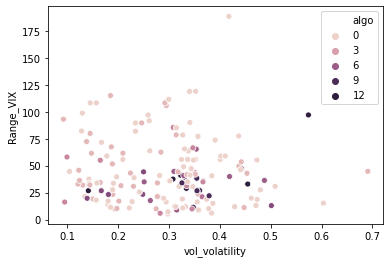

In [39]:
sns.scatterplot(x = 'vol_volatility',y = 'Range_VIX', hue = 'algo', data = all_data)
plt.savefig('VIX_Range_Volume_volatility_11Algos.jpg')

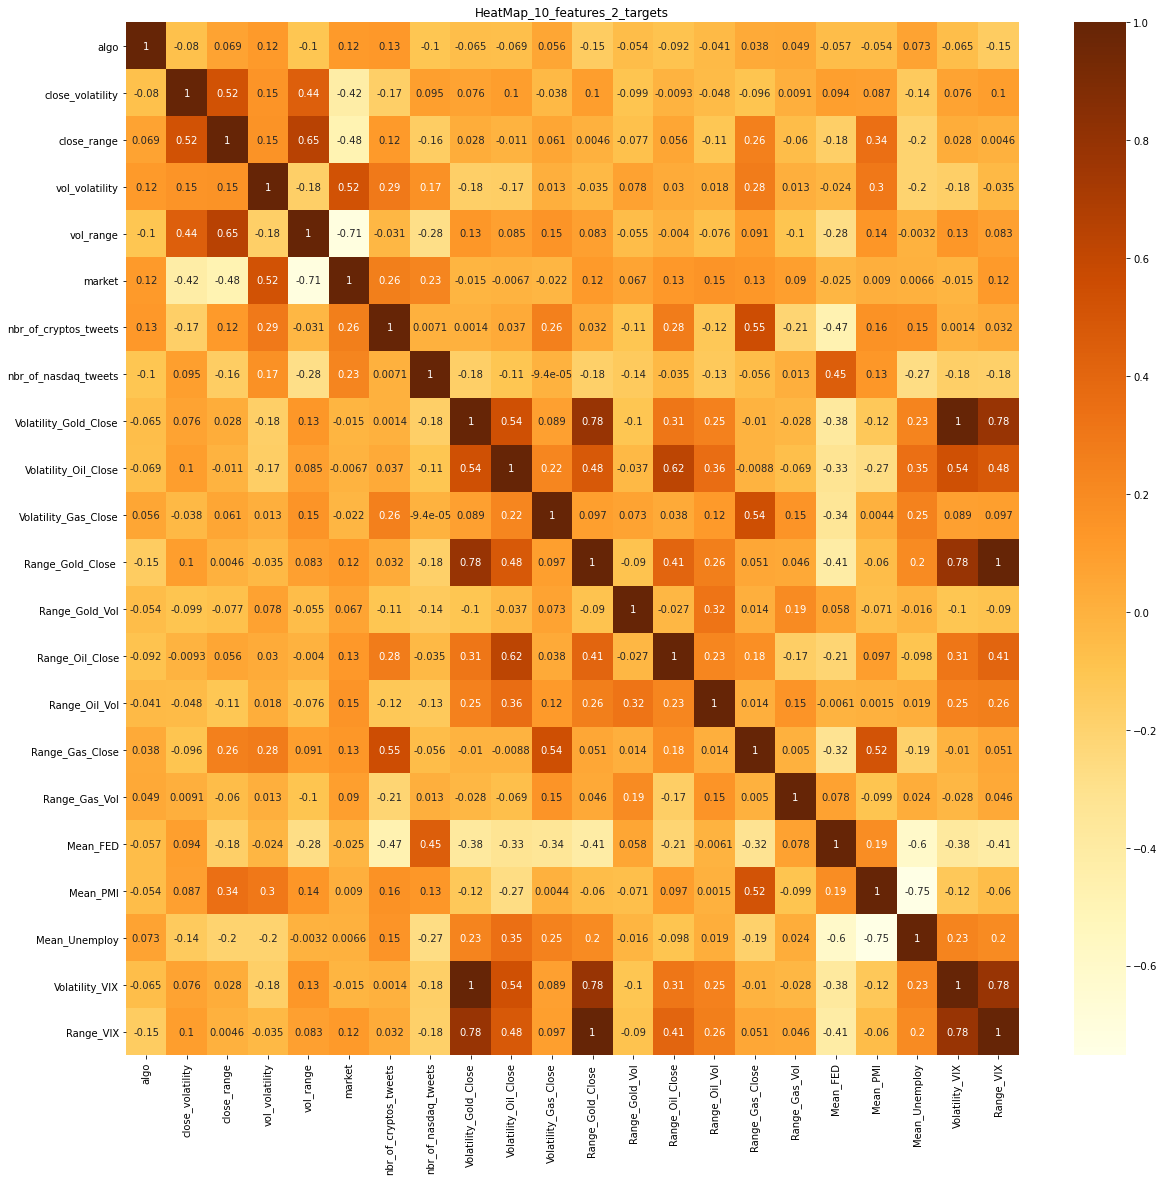

In [40]:
plt.figure(figsize=(20,19))
sns.heatmap(all_data.corr(), annot = True, cmap = "YlOrBr")
plt.title('HeatMap_10_features_2_targets')
plt.savefig('HeatMap_10_features.jpg')

In [41]:
X = all_data.drop(['algo'], axis = 1)
y = all_data['algo']

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
X_pca = pca_2.fit_transform(X_scaled)
plt.figure(figsize = (10, 8))
colormap = np.array(['#FF8B33', '#BB33FF'])

plt.scatter(X_pca[:,0], X_pca[:,1], s=100, c=colormap[y])
pop_a = mpatches.Patch(color='#FF8B33', label='BestMark')
pop_b = mpatches.Patch(color='#BB33FF', label='Other')
pop_c = mpatches.Patch(color='#FF8B33', label='BestMark')
pop_d = mpatches.Patch(color='#BB23FF', label='Other')
pop_e = mpatches.Patch(color='#FF7B33', label='BestMark')
pop_f = mpatches.Patch(color='#BB93FF', label='Other')
pop_g = mpatches.Patch(color='#FF0B33', label='BestMark')
pop_h = mpatches.Patch(color='#BB13FF', label='Other')
pop_i = mpatches.Patch(color='#BB63FF', label='Other')
plt.legend(handles=[pop_a,pop_b])
plt.title('PCA with 2 Components')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig('PCA_2.jpg')

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 720x576 with 0 Axes>